Text(0, -75, 'https://mybinder.org/v2/gh/kapeed2091/private-terrace/main?labpath=PrivateTerrace.ipynb')

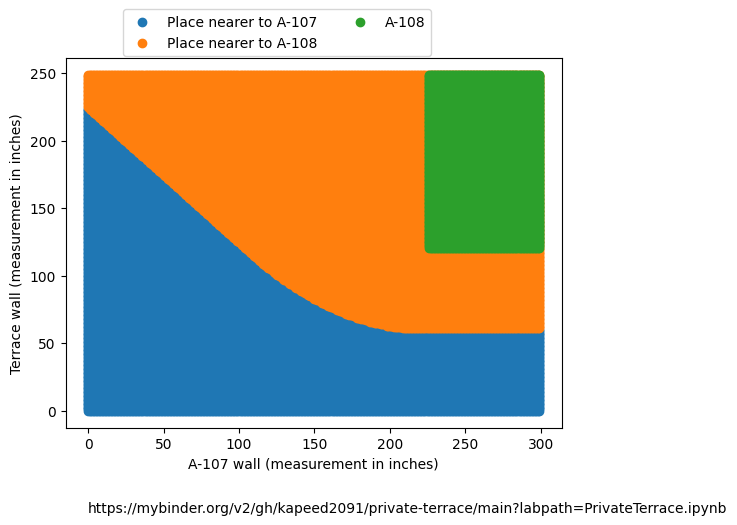

In [7]:
import math
import matplotlib.pyplot as plt

walls = [
    [(0,0), (1000, 0)],
    [(224, 120), (1000, 120)],
    [(224, 120), (224, 1000)],
]

# https://stackoverflow.com/a/2233538
def distance(wall, point):
    x1 = wall[0][0]
    y1 = wall[0][1]

    x2 = wall[1][0]
    y2 = wall[1][1]
    
    x3 = point[0]
    y3 = point[1]

    px = x2-x1
    py = y2-y1

    norm = px*px + py*py

    u =  ((x3 - x1) * px + (y3 - y1) * py) / float(norm)

    if u > 1:
        u = 1
    elif u < 0:
        u = 0

    x = x1 + u * px
    y = y1 + u * py

    dx = x - x3
    dy = y - y3

    # Note: If the actual distance does not matter,
    # if you only want to compare what this function
    # returns to other results of this function, you
    # can just return the squared distance instead
    # (i.e. remove the sqrt) to gain a little performance

    dist = (dx*dx + dy*dy)**.5

    return dist

def calculate_nearest_wall(point):
    # initialize variables to keep track of nearest wall and distance
    nearest = None
    min_distance = float('inf')
    
    # iterate over all walls and find the one closest to the point
    for wall in walls:        
        wall_distance = distance(wall, point)
        
        # check if the wall is closer than the current nearest wall
        if wall_distance < min_distance:
            nearest = wall
            min_distance = wall_distance
    
    return nearest


##############


x_points_107_pt = []
y_points_107_pt = []

x_points_108_pt = []
y_points_108_pt = []

x_points_108 = []
y_points_108 = []

for x in range(0, 300):
    for y in range(0, 250):
        if (x > 225 and y > 120):
            x_points_108.append(x)
            y_points_108.append(y)
        nearest_wall = calculate_nearest_wall((x, y))
#         print("Nearest wall ({0}, {1}) is {2}".format(x, y, str(nearest_wall)))
        
        if nearest_wall == [(0,0), (1000, 0)]:
            x_points_107_pt.append(x)
            y_points_107_pt.append(y)
        else:
            x_points_108_pt.append(x)
            y_points_108_pt.append(y)

plt.xlabel("A-107 wall (measurement in inches)")
plt.ylabel("Terrace wall (measurement in inches)")
plt.scatter(x_points_107_pt, y_points_107_pt, label="Place nearer to A-107")
plt.scatter(x_points_108_pt, y_points_108_pt, label="Place nearer to A-108")
plt.scatter(x_points_108, y_points_108, label="A-108")
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
plt.text(0, -75, "https://mybinder.org/v2/gh/kapeed2091/private-terrace/main?labpath=PrivateTerrace.ipynb")